In [1]:
s = '1111'

In [2]:
n = len(s)

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
q = QuantumRegister(2*n)
c = ClassicalRegister(2*n)
qc = QuantumCircuit(q,c)

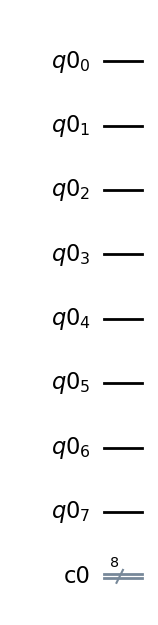

In [4]:
qc.draw('mpl')

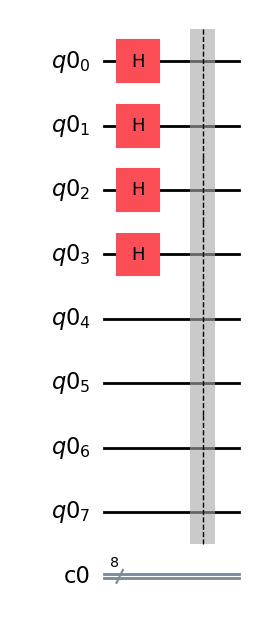

In [5]:
for i in range(n):
    qc.h(q[i])
qc.barrier()
qc.draw('mpl')

In [6]:
from qiskit_textbook.tools import simon_oracle

ModuleNotFoundError: No module named 'qiskit_textbook'